In [1]:
import numpy as np
import pandas as pd
import toad

In [2]:
data = pd.read_csv('./data/germancredit.csv')

In [3]:
data.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   status.of.existing.checking.account                       1000 non-null   object
 1   duration.in.month                                         1000 non-null   int64 
 2   credit.history                                            1000 non-null   object
 3   purpose                                                   1000 non-null   object
 4   credit.amount                                             1000 non-null   int64 
 5   savings.account.and.bonds                                 1000 non-null   object
 6   present.employment.since                                  1000 non-null   object
 7   installment.rate.in.percentage.of.disposable.income       1000 non-null   int64 
 8   personal.status.and.sex      

In [5]:
data.describe()


,duration.in.month,credit.amount,installment.rate.in.percentage.of.disposable.income,present.residence.since,age.in.years,number.of.existing.credits.at.this.bank,number.of.people.being.liable.to.provide.maintenance.for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
data.columns

Index(['status.of.existing.checking.account', 'duration.in.month',
       'credit.history', 'purpose', 'credit.amount',
       'savings.account.and.bonds', 'present.employment.since',
       'installment.rate.in.percentage.of.disposable.income',
       'personal.status.and.sex', 'other.debtors.or.guarantors',
       'present.residence.since', 'property', 'age.in.years',
       'other.installment.plans', 'housing',
       'number.of.existing.credits.at.this.bank', 'job',
       'number.of.people.being.liable.to.provide.maintenance.for', 'telephone',
       'foreign.worker', 'creditability'],
      dtype='object')

In [7]:
combiner = toad.transform.Combiner()

In [10]:
data['creditability'].replace({'good':0,'bad':1},inplace=True)

In [11]:
combiner.fit(data,y='creditability',method='chi',min_samples=0.05)

In [13]:
data['duration.in.month'].value_counts()

duration.in.month
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64

In [14]:
combiner.export()['duration.in.month']

[9, 12, 13, 16, 36, 45]

In [15]:
import matplotlib.pyplot as plt
from toad.plot import bin_plot
c2 = toad.transform.Combiner()
c2.fit(data[['creditability','duration.in.month']],y='creditability',method='chi',n_bins=7)
transformed = c2.transform(data[['creditability','duration.in.month']],labels=True)

In [18]:
transformed['duration.in.month'].value_counts()

duration.in.month
04.[16 ~ 36)     399
02.[12 ~ 13)     179
05.[36 ~ 45)     100
00.[-inf ~ 9)     94
01.[9 ~ 12)       86
03.[13 ~ 16)      72
06.[45 ~ inf)     70
Name: count, dtype: int64

<Axes: xlabel='duration.in.month', ylabel='prop'>

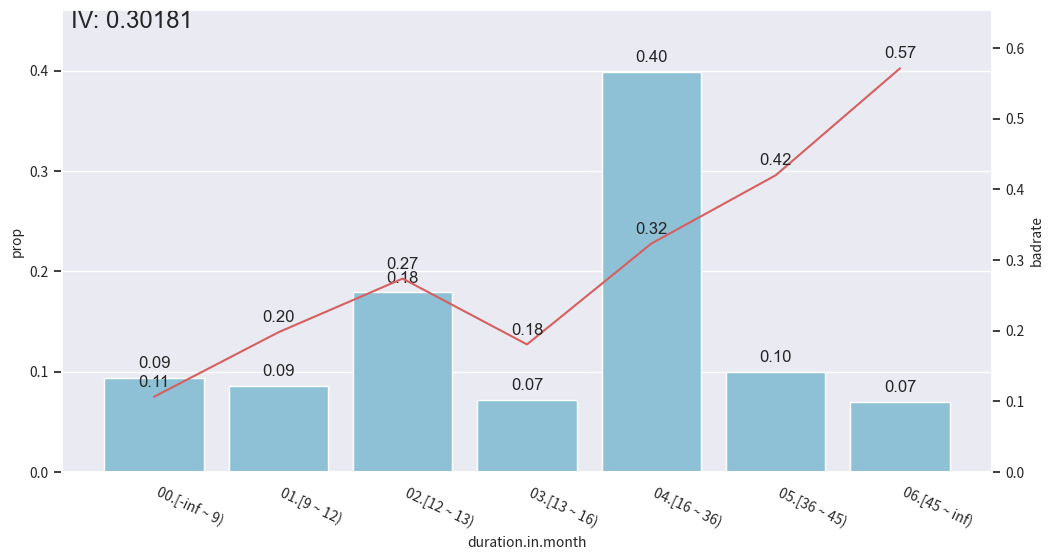

In [19]:
bin_plot(transformed,x='duration.in.month',target='creditability')

<Axes: xlabel='duration.in.month', ylabel='prop'>

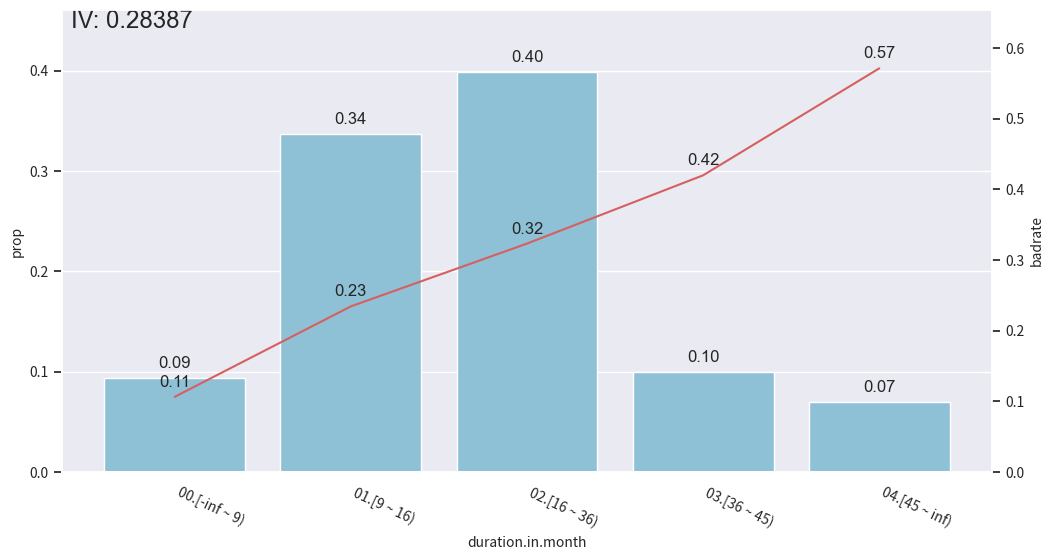

In [20]:
c2 = toad.transform.Combiner()
c2.fit(data[['creditability','duration.in.month']],y='creditability',method='chi',n_bins=5)
transformed = c2.transform(data[['creditability','duration.in.month']],labels=True)
bin_plot(transformed,x='duration.in.month',target='creditability')

In [21]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(data.drop('creditability',axis=1),data['creditability'],test_size=0.25,random_state=450)

In [22]:
data_train = pd.concat([x_train,y_train],axis=1)
data_train['type'] = 'train'

data_test = pd.concat([x_test,y_test],axis=1)
data_test['type'] = 'test'

In [24]:
adj_bin = {'duration.in.month':[9,12,18,33]}
c1 = toad.transform.Combiner()
c1.set_rules(adj_bin)

In [25]:
data_ = pd.concat([data_train,data_test])
temp_data = c1.transform(data_[['duration.in.month','creditability','type']])


<Axes: xlabel='type', ylabel='badrate'>

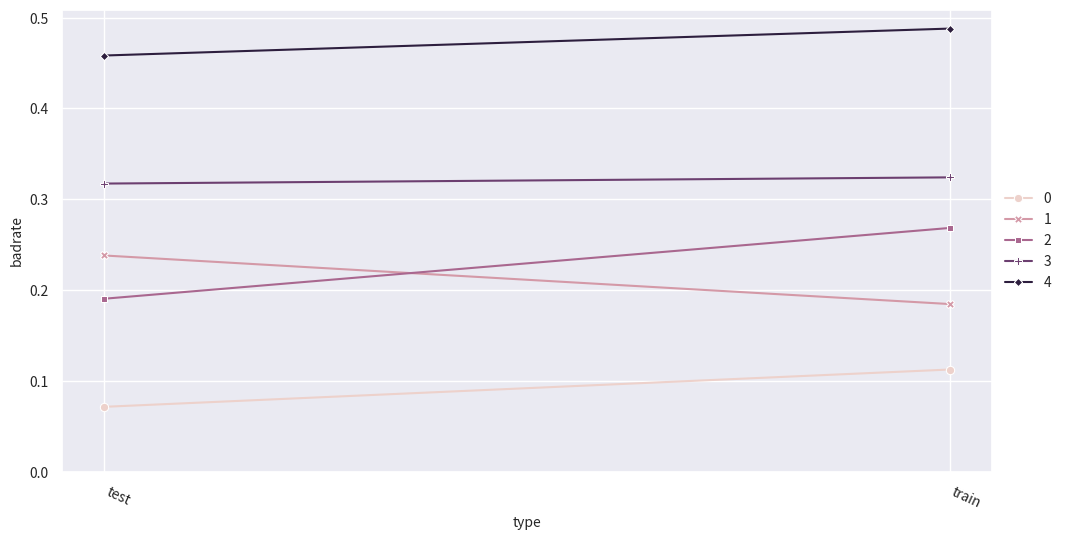

In [26]:
from toad.plot import badrate_plot,proportion_plot
badrate_plot(temp_data,target='creditability',x='type',by='duration.in.month')

<Axes: xlabel='value', ylabel='proportion'>

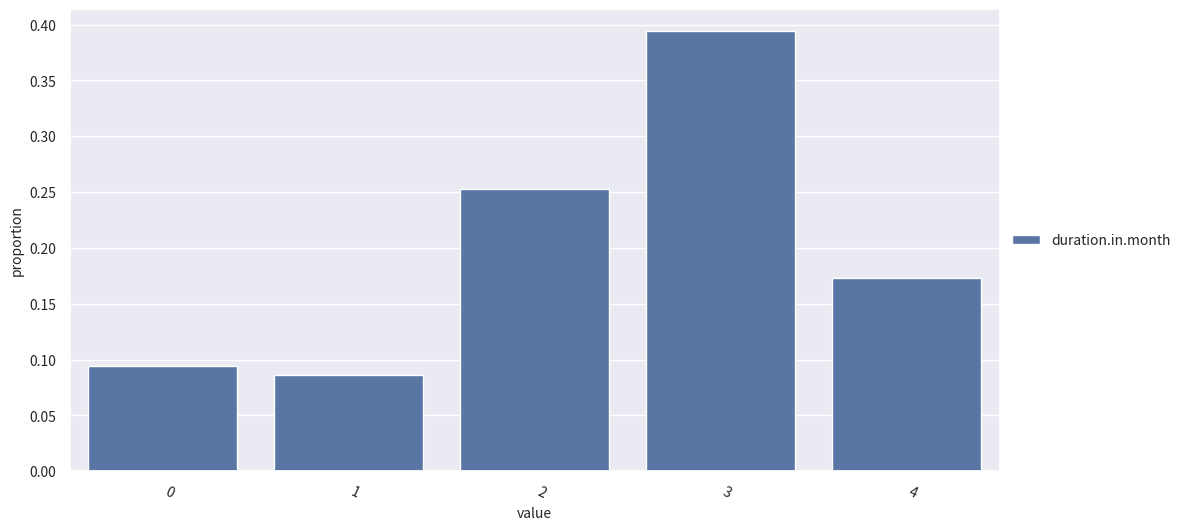

In [27]:
proportion_plot(temp_data['duration.in.month'])

<Axes: xlabel='type', ylabel='badrate'>

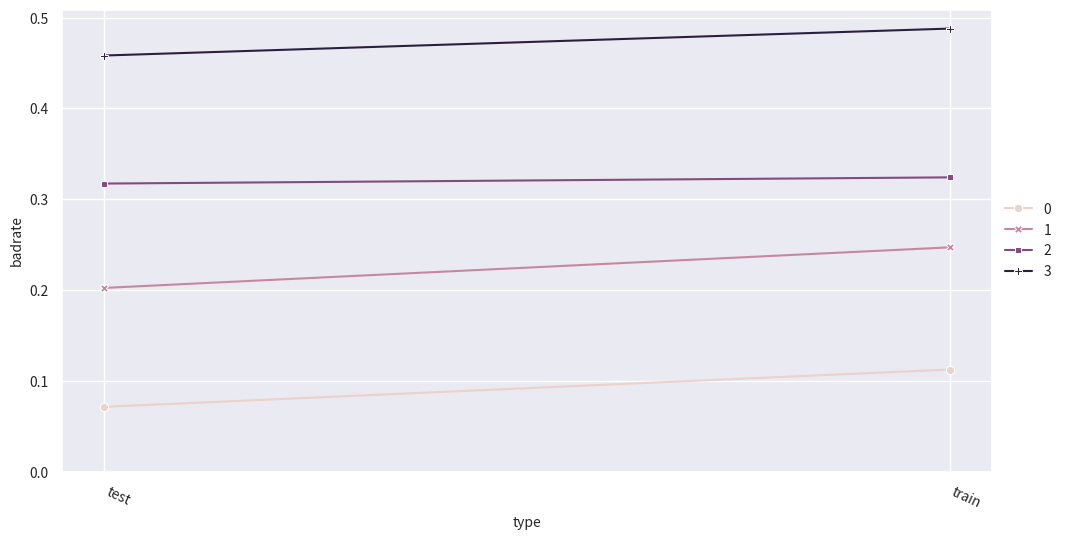

In [28]:
adj_bin = {'duration.in.month':[9,18,33]}
c1 = toad.transform.Combiner()
c1.set_rules(adj_bin)
data_ = pd.concat([data_train,data_test])
temp_data = c1.transform(data_[['duration.in.month','creditability','type']])
badrate_plot(temp_data,target='creditability',x='type',by='duration.in.month')

In [29]:
binned_data = c1.transform(data_train)
transer = toad.transform.WOETransformer()
data_train_woe = transer.fit_transform(binned_data,binned_data['creditability'],exclude = ['creditability','type'])

In [30]:
data_train_woe['duration.in.month'].value_counts()

duration.in.month
 0.099812    290
-0.279729    255
 0.786622    125
-1.230824     80
Name: count, dtype: int64

In [31]:
binned_data_test = c1.transform(data_test)

In [32]:
transer.transform(binned_data_test)

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability,type
643,-1.072960,0.099812,-0.615085,-0.384125,-0.263981,0.244802,-0.477555,0.154169,-0.302447,-0.807596,...,0.611488,-0.157497,-0.174441,-0.053488,0.002648,0.012822,0.001722,0.043742,0,test
17,0.786313,0.099812,1.327108,0.246845,-0.263981,-0.939428,0.399313,-0.153980,-0.212356,-0.014765,...,0.760523,0.563756,-0.174441,-0.012666,0.002648,0.012822,-0.001130,0.043742,0,test
150,-1.072960,-1.230824,0.046896,-0.384125,-0.263981,0.344009,-0.173326,-0.153980,-0.212356,-0.014765,...,0.429166,0.563756,0.323806,0.039485,0.002648,-0.069825,0.001722,0.043742,0,test
111,-0.446302,-0.279729,0.046896,0.623322,-0.263981,0.244802,0.399313,0.154169,0.355058,-0.014765,...,0.777473,-0.157497,0.441143,0.039485,0.002648,0.012822,0.001722,0.043742,0,test
467,-1.072960,0.786622,0.215592,-0.384125,-0.263981,-0.939428,-0.173326,-0.056341,-0.212356,-0.014765,...,-0.263981,0.563756,-0.174441,-0.053488,0.002648,-0.069825,-0.001130,0.043742,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,-1.072960,-0.279729,-0.615085,-0.384125,0.834631,-0.939428,-0.173326,0.154169,-0.212356,-0.014765,...,-1.244810,-0.157497,-0.174441,-0.053488,0.002648,0.012822,-0.001130,0.043742,0,test
601,0.363027,-0.279729,0.046896,0.141484,-0.263981,0.244802,0.002898,0.154169,0.355058,-0.014765,...,-0.146198,-0.157497,-0.174441,0.039485,0.002648,0.012822,-0.001130,0.043742,1,test
666,0.363027,0.099812,0.997150,0.141484,-0.263981,-0.839345,0.002898,0.154169,-0.212356,-0.014765,...,0.141484,0.723406,-0.174441,0.039485,0.002648,-0.069825,0.001722,0.043742,0,test
989,0.363027,0.099812,-0.615085,-0.384125,0.834631,0.244802,-0.173326,0.154169,-0.212356,-0.014765,...,-0.418132,-0.157497,-0.174441,-0.053488,-0.298467,0.012822,-0.001130,0.043742,0,test
